In [11]:
import numpy as np
import gdal
import statsmodels.api as sm 
# import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams["font.sans-serif"] = "Arial"
%matplotlib inline


In [12]:
try:
    ds = gdal.Open('S:\JESSE\GIS\DEM\Elev_FlowAccum_FlowLength_Watershed4.tif')
except RuntimeError, e:
    print 'Unable to open .tif'
    print e
    sys.exit(1)

print ds.GetMetadata()

#Get flow length from arcgis tool 'flowlength', 'downstream' option

{'AREA_OR_POINT': 'Area'}


In [13]:
band1 = ds.GetRasterBand(1)
band2 = ds.GetRasterBand(2)
band3 = ds.GetRasterBand(3)
band4 = ds.GetRasterBand(4)
#Band 1 = elev
#Band 2 = Accum
#Band 3 = Length
#Band 4 = watershed


In [14]:
# turn into 1-d arrays, and only use values > 0 (sometimes no-value data is very large negative number)
array1 = band1.ReadAsArray().flatten()
#array1 = array1[array1>0]
array2 = band2.ReadAsArray().flatten()
#array2 = array2[array2>0]
array3 = band3.ReadAsArray().flatten()
#array3 = array3[array3>0]
array4 = band4.ReadAsArray().flatten()
#array4 = array4[array4>0]

In [26]:
elderElev = array1[array4 == 1]
foxElev = array1[array4 == 2]
hankElev = array1[array4 == 3]
dryElev = array1[array4 == 4]

elderAccum = array2[array4 == 1]
foxAccum = array2[array4 == 2]
hankAccum = array2[array4 == 3]
dryAccum = array2[array4 == 4]

elderLength = array3[array4 == 1]
foxLength = array3[array4 == 2]
hankLength = array3[array4 == 3]
dryLength = array3[array4 == 4]

#watershed key:
#Dry = 4
#Hank = 3
#Elder = 1
#Fox = 2

In [27]:
accumThresholdMelange = 1085
accumThresholdCoastal = 6180   
accumThresholdMelangeTrunk = 1000000 
accumThresholdCoastalTrunk = 1000000  

In [28]:
elderElev = elderElev[elderAccum > accumThresholdCoastal]
foxElev = foxElev[foxAccum > accumThresholdCoastal]
hankElev = hankElev[hankAccum > accumThresholdMelange]
dryElev = dryElev[dryAccum > accumThresholdMelange]

elderLength = elderLength[elderAccum > accumThresholdCoastal]
foxLength = foxLength[foxAccum > accumThresholdCoastal]
hankLength = hankLength[hankAccum > accumThresholdMelange]
dryLength = dryLength[dryAccum > accumThresholdMelange]

elderAccum = elderAccum[elderAccum > accumThresholdCoastal]
foxAccum = foxAccum[foxAccum > accumThresholdCoastal]
hankAccum = hankAccum[hankAccum > accumThresholdMelange]
dryAccum = dryAccum[dryAccum > accumThresholdMelange]


In [29]:
elderElevTrunk = elderElev[elderAccum > accumThresholdCoastalTrunk]
foxElevTrunk = foxElev[foxAccum > accumThresholdCoastalTrunk]
hankElevTrunk = hankElev[hankAccum > accumThresholdMelangeTrunk]
dryElevTrunk = dryElev[dryAccum > accumThresholdMelangeTrunk]

elderLengthTrunk = elderLength[elderAccum > accumThresholdCoastalTrunk]
foxLengthTrunk = foxLength[foxAccum > accumThresholdCoastalTrunk]
hankLengthTrunk = hankLength[hankAccum > accumThresholdMelangeTrunk]
dryLengthTrunk = dryLength[dryAccum > accumThresholdMelangeTrunk]

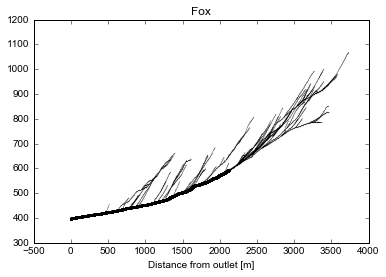

In [30]:
foxLength = foxLength -min(foxLength)
foxLengthTrunk = foxLengthTrunk -min(foxLengthTrunk)


plt.scatter(foxLength,foxElev, s=0.001, c='grey', zorder=-1)
plt.scatter(foxLengthTrunk,foxElevTrunk, s=3, c='black', zorder=0)
plt.title('Fox')
plt.xlabel('Elevation [m]')
plt.xlabel('Distance from outlet [m]')
plt.savefig('fox long profile.pdf')

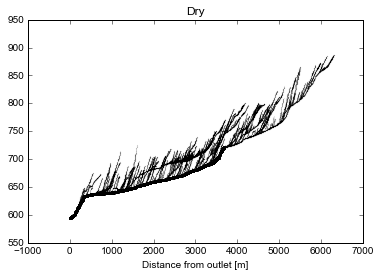

In [31]:
dryLength = dryLength -min(dryLength)
dryLengthTrunk = dryLengthTrunk -min(dryLengthTrunk)


plt.scatter(dryLength,dryElev, s=0.001, c='grey', zorder=-1)
plt.scatter(dryLengthTrunk,dryElevTrunk, s=3, c='black', zorder=0)
plt.title('Dry')
plt.xlabel('Elevation [m]')
plt.xlabel('Distance from outlet [m]')
plt.savefig('dry long profile.pdf')